#Lab 9

implement the Deutsch-Jozsa algorithm in Qiskit

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as  np

Show the quantum circuit implementation of the query gate

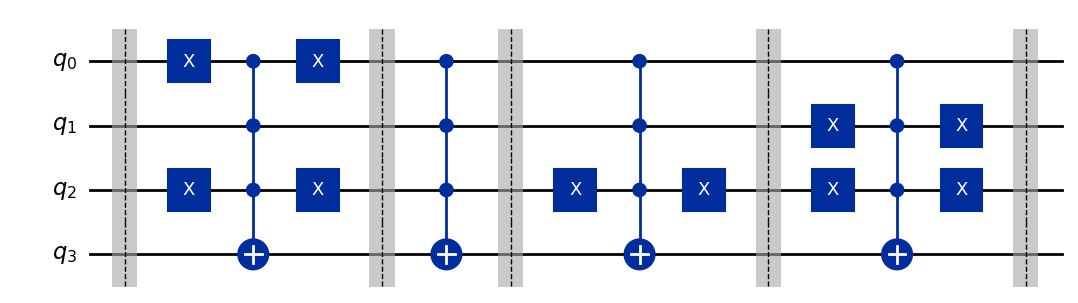

In [10]:
from qiskit import QuantumCircuit
import numpy as np

def dj_function(num_qubits):
    qc = QuantumCircuit(num_qubits + 1)

    # 50% chance to be constant, 50% chance to be balanced
    if np.random.randint(0, 2):
        
        if np.random.randint(0, 2):
            qc.x(num_qubits) # flip output qubit to make it constantly 1
        return qc

    
    on_states = np.random.choice(
        range(2**num_qubits), 
        2**num_qubits // 2, 
        replace = False 
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()
        
        qc = add_cx(qc, f"{state:0b}") 
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()
    
    return qc

display(dj_function(3).draw(output='mpl'))

In [11]:
def compile_circuit(function: QuantumCircuit):
    n = function.num_qubits - 1
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qc.h(range(n+1))
    qc.compose(function, inplace = True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [12]:
def dj_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots = 1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

Deutsch-Jozsa alo 
Creates the Deutsch-Jozsa circuit, taking a quantum circuit implementation of a query gate as an argument

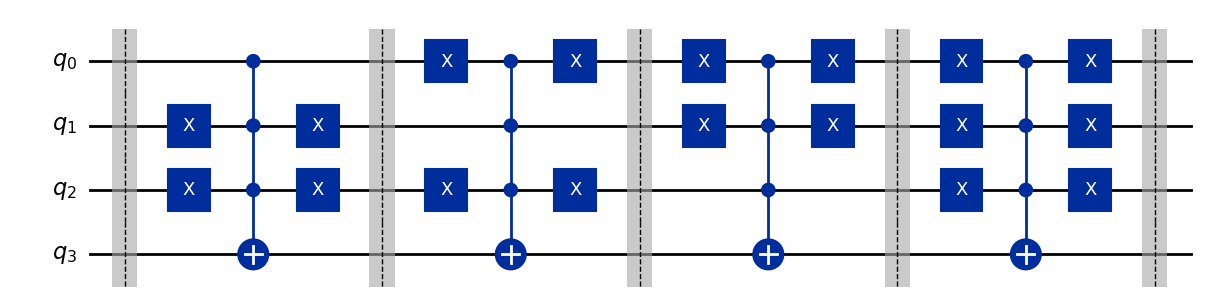

'balanced'

In [23]:
f = dj_function(3)
display(f.draw(output='mpl'))
display(dj_algorithm(f))